## Description
This is the main documentation for this week's assignment. All the provided files are also accessible and will be maintained via my GitHub [here](https://github.com/ClaasFil/metro_model_deve).

In [1]:
import numpy as np
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
import subprocess
import matplotlib as mpl

In [2]:
def read_namelist(relative_path):
    """
    Read a Fortran namelist file and extract parameters from a relative path.

    Parameters:
    relative_path (str): Relative path to the namelist file from the notebook.

    Returns:
    dict: Dictionary of parameters read from the file.
    """
    # Construct the full path using the notebook's directory
    notebook_dir = os.getcwd()  # Gets the directory of the current script
    file_path = os.path.join(notebook_dir, relative_path)  # Constructs the full path

    params = {}
    try:
        with open(file_path, 'r') as file:
            for line in file:
                line = line.strip()
                if line.startswith('&') or line.startswith('/'):
                    continue
                key_value = line.split('=')
                if len(key_value) == 2:
                    key = key_value[0].strip()
                    value = key_value[1].strip().rstrip('/')
                    # Convert numerical values from strings
                    if value.isdigit():
                        value = int(value)
                    else:
                        try:
                            value = float(value)
                        except ValueError:
                            pass  # Keep as string if it's not a number
                    params[key] = value
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' does not exist.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

    return params



In [3]:
def read_and_reshape_temperature_csv(file_name, nx, ny, debug=False):
    """
    Read temperature data from a CSV file, using the provided dimensions to reshape the data.
    
    Parameters:
        file_name (str): Path to the CSV file to read.
        nx (int): Number of rows in each reshaped matrix.
        ny (int): Number of columns in each reshaped matrix.
        debug (bool): If True, non-float values will be replaced with 0.0.
    
    Returns:
        np.ndarray: An array of reshaped matrices.
    """
    notebook_path = os.getcwd()
    data_path = os.path.join(notebook_path, '../../data', file_name)
    
    with open(data_path, 'r') as file:
        reader = csv.reader(file, delimiter=',', skipinitialspace=True)

        all_data = []

        for row in reader:
            # Process each number in the row; handle casting issues if debug is True
            float_row = []
            for num in row:
                try:
                    float_row.append(float(num))
                except ValueError:
                    if debug:
                        print(f"Warning: Invalid float value '{num}' converted to 0.0")
                        float_row.append(0.0)  # Set invalid float values to 0.0
                    else:
                        raise ValueError(f"Unable to convert {num} to float.")
            all_data.extend(float_row)

    # Ensure the total number of data points is compatible with the reshape dimensions
    if len(all_data) % (nx * ny) != 0:
        raise ValueError("Data size does not match expected dimensions.")

    all_data = np.array(all_data)
    matrix = all_data.reshape(-1, nx, ny)

    return np.transpose(matrix, (0, 2, 1))  # Transpose each matrix for appropriate orientation

In [4]:
def plt_singel_frame(data, title, save=False, save_name='frame.png'):
    """
    Plot a single frame of temperature data.
    
    Parameters:
        data (np.ndarray): 2D array of temperature data.
        title (str): Title of the plot.
        cmap (str): Colormap to use in the plot.
        save (bool): If True, the plot will be saved to a file.
        save_name (str): Name of the file to save the plot.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(data)
    plt.colorbar()
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.tight_layout()
    
    if save:
        plt.savefig(save_name)
    else:
        plt.show()

In [5]:
# Reading the parameters from namelist:

relative_path = '../../data/namelist/ex_7_cos.nml'
parameters = read_namelist(relative_path)
#print(parameters)
nx = parameters['nx']
ny = parameters['ny']

# Cosine initialization

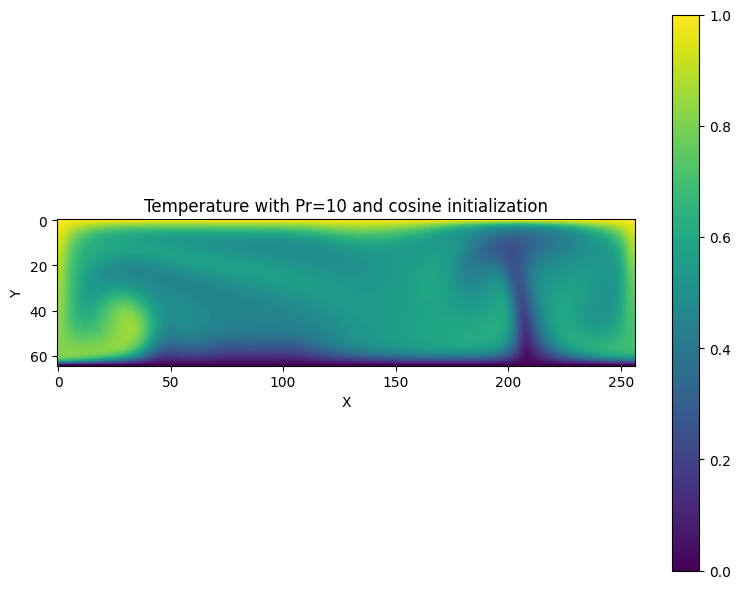

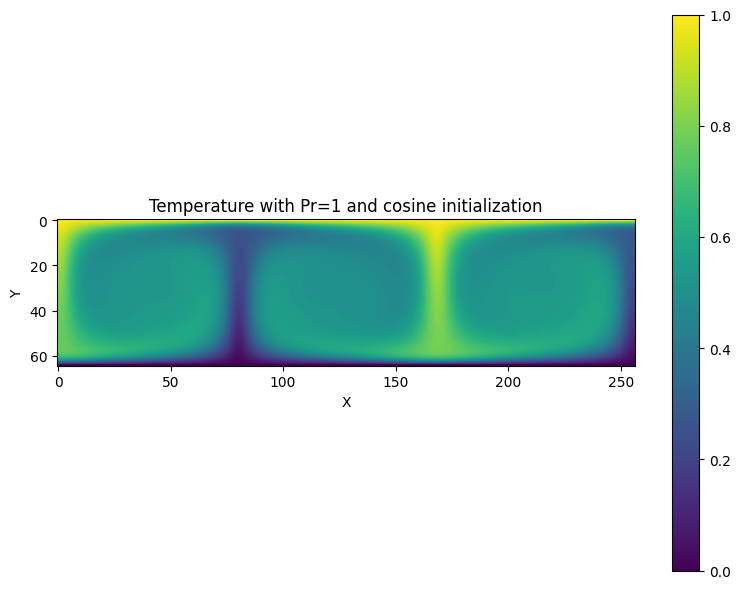

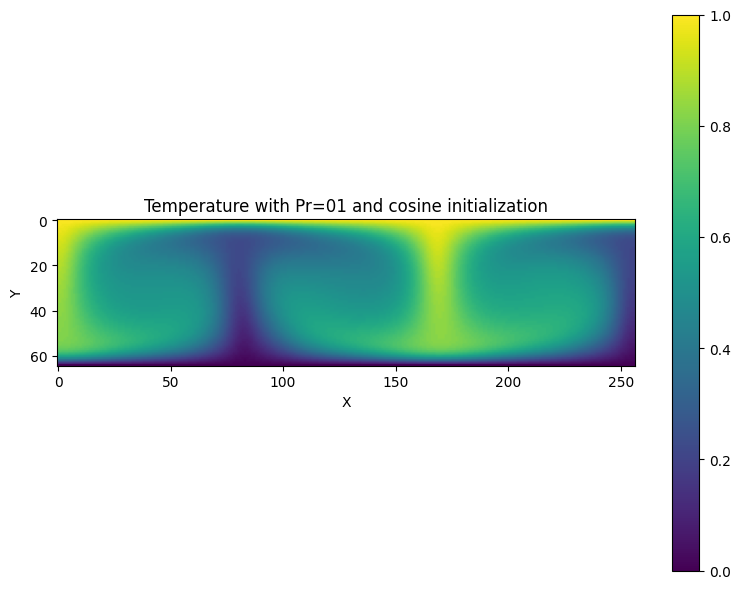

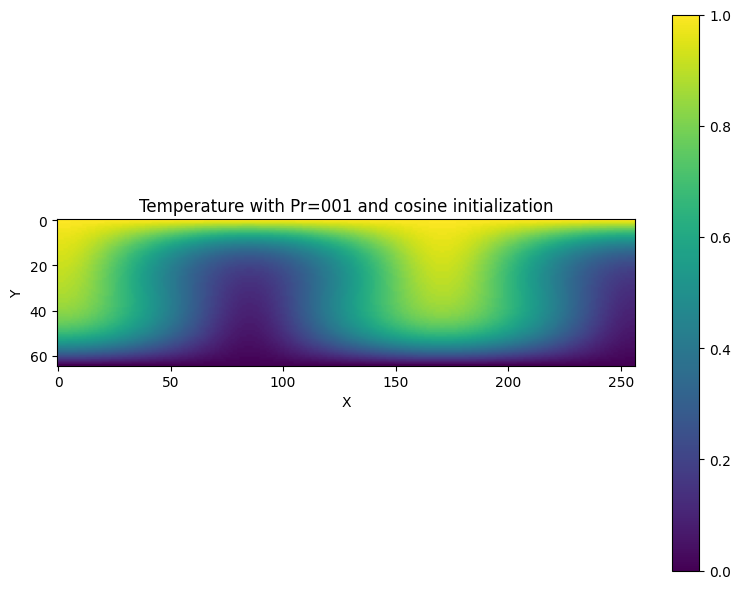

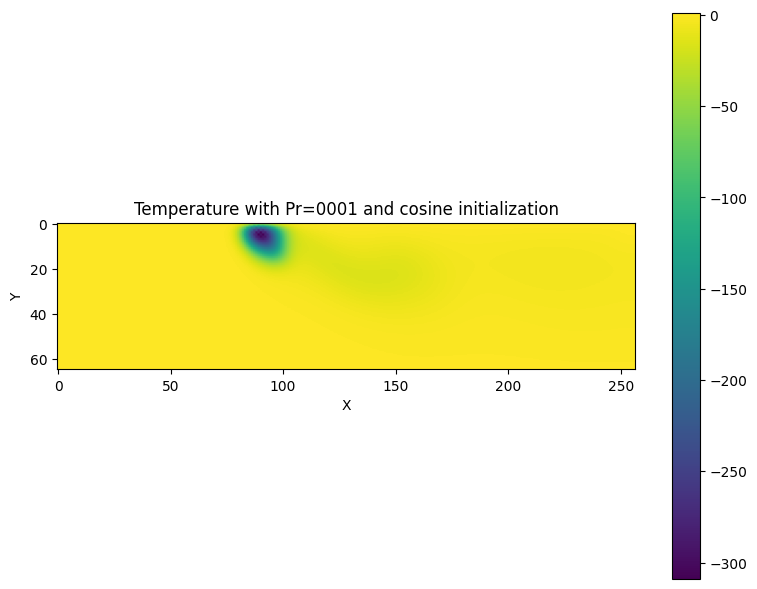

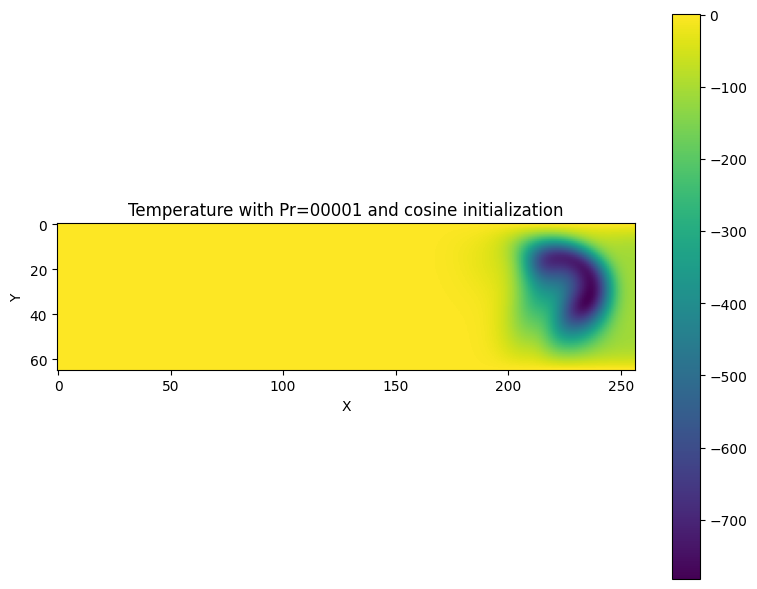

In [6]:
# Plot temperate fields for different Prandtl numbers:
for Pr in ["10", "1", "01", "001", "0001", "00001"]:
    T = read_and_reshape_temperature_csv(f'ex_8/T_cos_Pr{Pr}.csv',nx, ny)
    plt_singel_frame(T[-1], f'Temperature with Pr={Pr} and cosine initialization', save=False, save_name=f'frame_{Pr}.png')

We observe that the cosine initialisation gets numerically instable for Prandtl number smaller or equal to 0.01. This is not the case for the random initialisation:

# Random initialization

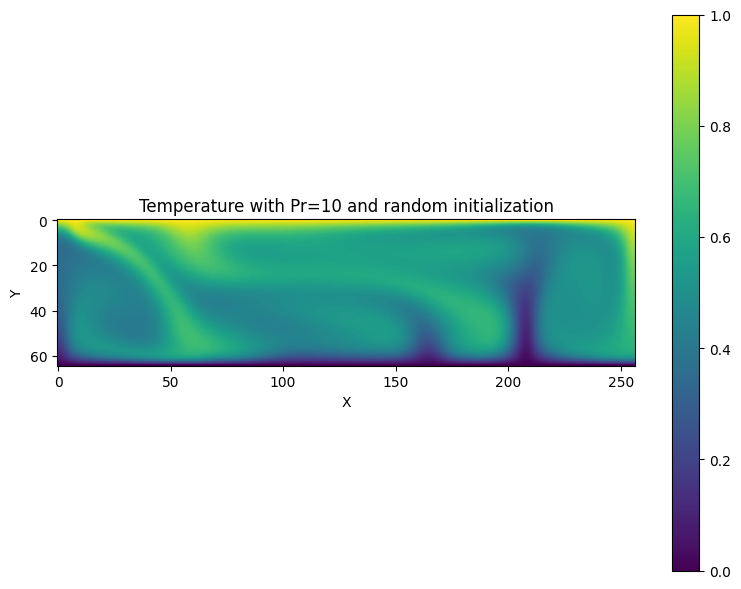

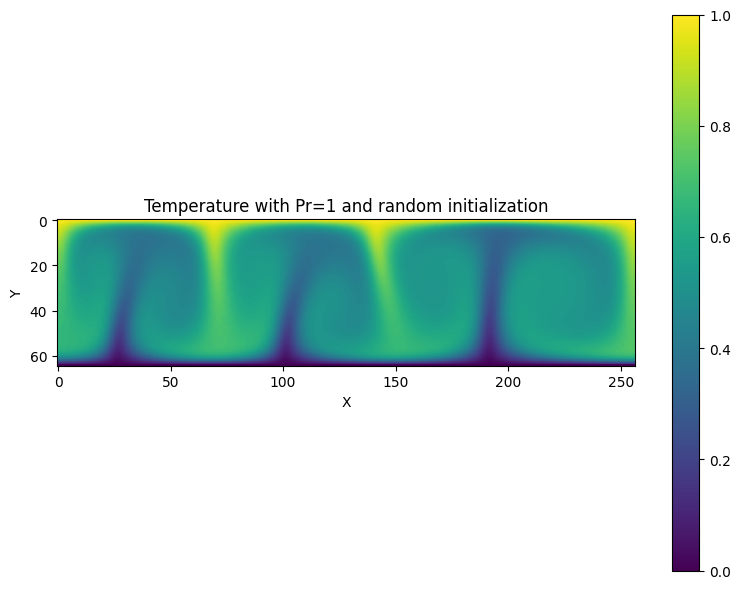

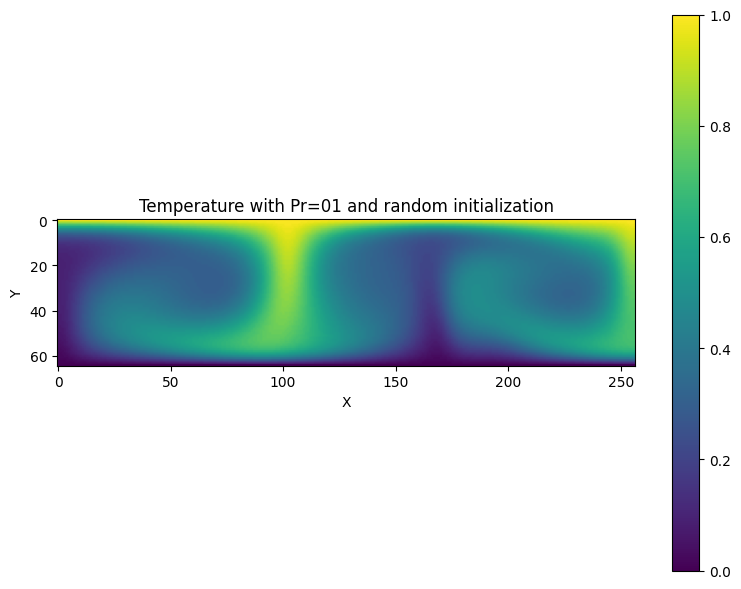

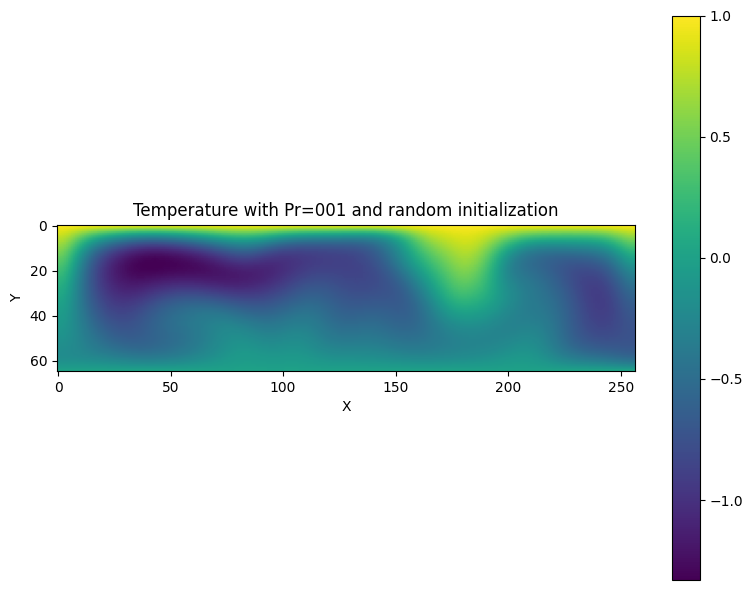

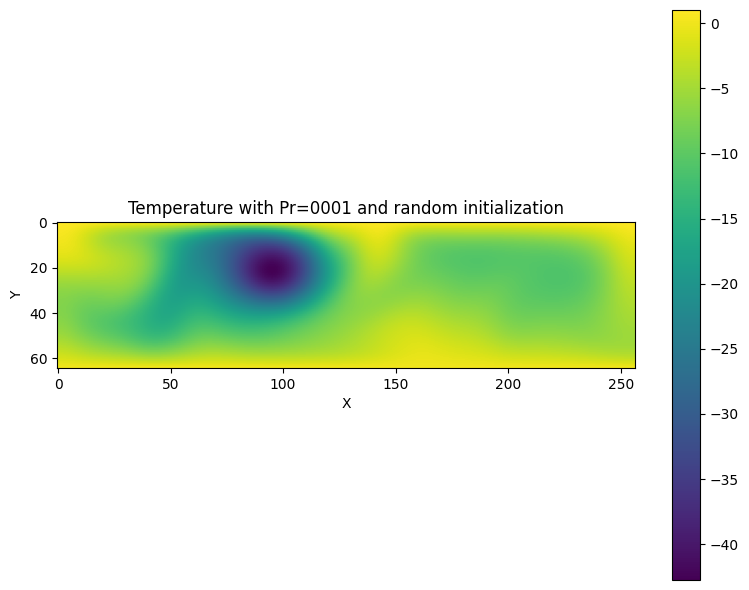

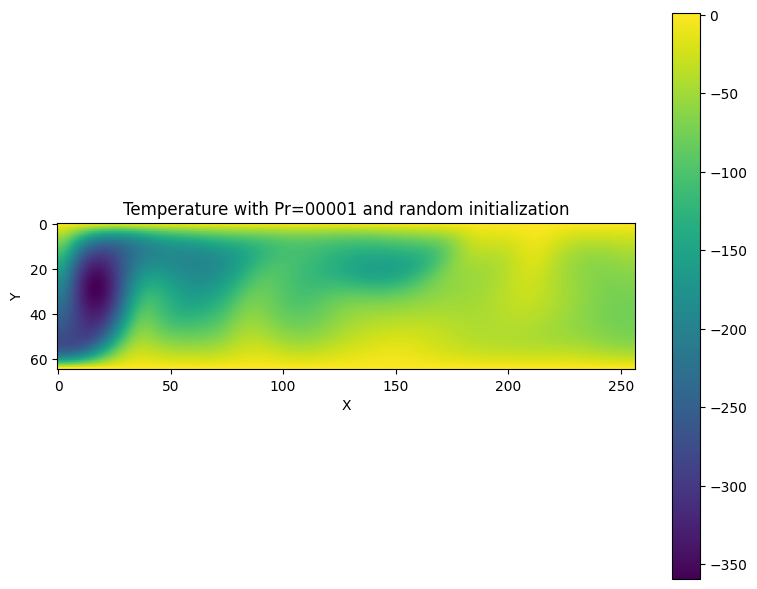

In [7]:
# Plot temperate fields for different Prandtl numbers:
for Pr in ["10", "1", "01","001", "0001", "00001"]:
    T = read_and_reshape_temperature_csv(f'ex_8/T_rand_Pr{Pr}.csv',nx, ny)
    plt_singel_frame(T[-1], f'Temperature with Pr={Pr} and random initialization', save=False, save_name=f'frame_{Pr}.png')